In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

Loading the test set: dataframe, predicted and actual $d_{hkl}$ distances

In [2]:
df = pd.read_csv('dftest.csv')
pred = np.load('2R4P2R_2R3P2R_54_predtest.npy')
y = np.load('ytest.npy')

Plotting the learning curves

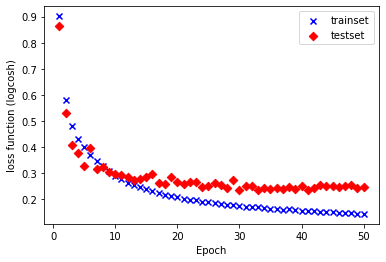

In [3]:
cf = pd.read_csv('2R4P2R_2R3P2R_54.csv', header=None)
plt.figure()
plt.scatter(np.arange(1,cf.shape[0]+1), cf[0], marker='x', color='blue', label = 'trainset')
plt.scatter(np.arange(1,cf.shape[0]+1), cf[1], marker='D', color='red', label = 'testset')
plt.ylabel('loss function (logcosh)')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Computing the root-mean-squared error (RMSE) for each $d_{hkl}$ distance ($d_{100}$, $d_{010}$, $d_{001}$, $d_{110}$, $d_{101}$, and $d_{100}$):

In [4]:
((y - pred)**2).mean(axis=0)**0.5

array([1.85280288, 0.85287236, 0.61185534, 0.73923682, 0.57200382,
       0.64601275])

Calculating the global RMSE:

In [5]:
rmse = ((y - pred)**2).mean()**0.5

In [6]:
rmse

0.985361916456572

Checking the proportion of the assessments with an error within one RMSE:

In [7]:
(((y-pred)**2).mean(axis=1)**0.5 <= rmse).sum()/y.shape[0]

0.8300813008130081

Plots for interplanar distance $d_{100}$
RMSE 1.8528 angstrom
MAPE: 6.3512 %


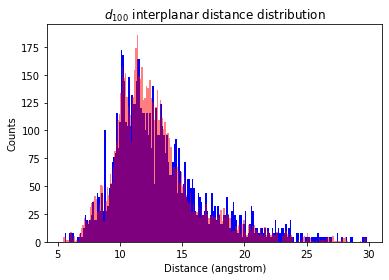

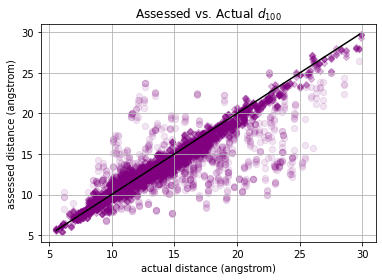

Plots for interplanar distance $d_{010}$
RMSE 0.8529 angstrom
MAPE: 5.9028 %


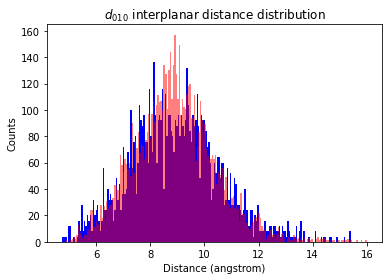

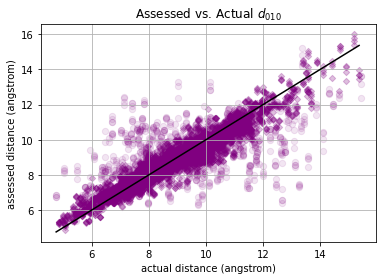

Plots for interplanar distance $d_{001}$
RMSE 0.6119 angstrom
MAPE: 6.8204 %


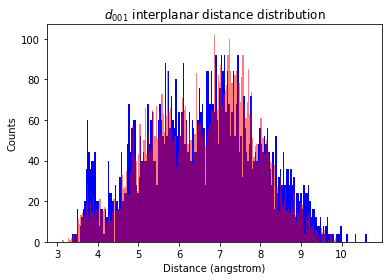

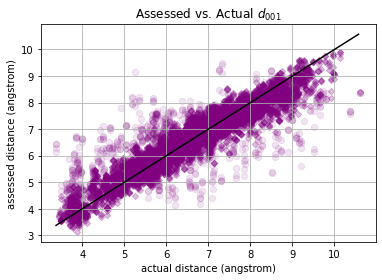

Plots for interplanar distance $d_{110}$
RMSE 0.7392 angstrom
MAPE: 7.5792 %


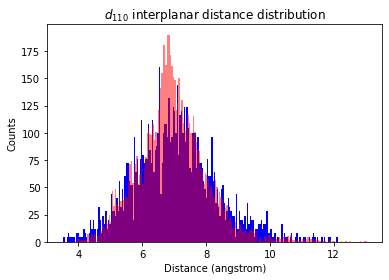

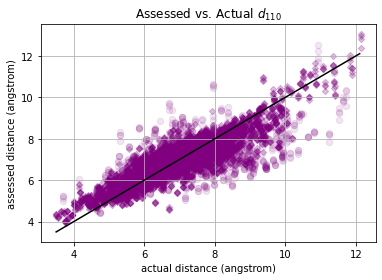

Plots for interplanar distance $d_{101}$
RMSE 0.572 angstrom
MAPE: 7.442 %


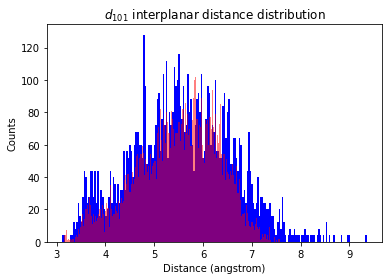

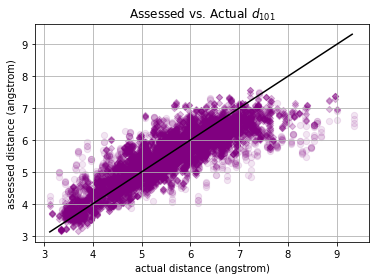

Plots for interplanar distance $d_{011}$
RMSE 0.646 angstrom
MAPE: 9.2336 %


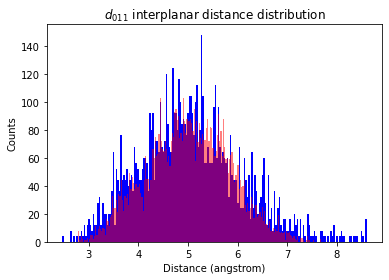

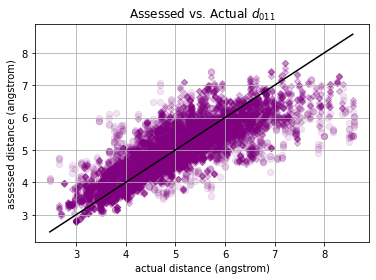

In [8]:
rmses = dict()

condl = ((y-pred)**2).mean(axis=1)**0.5 <= 1*rmse
condl = np.argwhere(condl)[:,0]

condg = ((y-pred)**2).mean(axis=1)**0.5 > 1*rmse
condg = np.argwhere(condg)[:,0]

dhkl = {0:r'$d_{100}$', 1:r'$d_{010}$', 2:r'$d_{001}$', 
        3:r'$d_{110}$', 4:r'$d_{101}$', 5:r'$d_{011}$'}

for j in range(y.shape[-1]):
    
    rmses[j] = ((y[:,j]-pred[:,j])**2).mean()**0.5
    mape = 100*abs(y[:,j]-pred[:,j])/(y[:,j])
    
    print('Plots for interplanar distance', dhkl[j])
    print('RMSE', rmses[j].round(4), 'angstrom')
    print('MAPE:',mape.mean().round(4), '%')

    df['y' + str(j)] = y[:,j]
    df['p' + str(j)] = pred[:,j]
    df['diff' + str(j)] = abs(y[:,j]-pred[:,j])

    plt.figure()
    plt.title(dhkl.get(j, None) + ' interplanar distance distribution')
    plt.hist(y[:,j], bins=200, color='blue')
    plt.hist(pred[:,j], bins = 200, color = 'red', alpha = 0.5 )
    plt.ylabel('Counts')
    plt.xlabel('Distance (angstrom)')
    plt.show()
    
    plt.figure()
    plt.title('Assessed vs. Actual ' + dhkl.get(j, None))
    plt.scatter(y[condl,j],pred[condl,j], marker='D', color='purple', s=20, alpha=0.25)
    plt.scatter(y[condg,j],pred[condg,j], marker='o', color='purple', s=40, alpha=0.10)
    plt.ylabel('assessed distance (angstrom)')
    plt.xlabel('actual distance (angstrom)')
    plt.grid(True)
    plt.plot(np.arange(y[:,j].min(), y[:,j].max(),0.1), np.arange(y[:,j].min(), y[:,j].max(),0.1), color='black')
    plt.show()
    

Plot of the error distribution

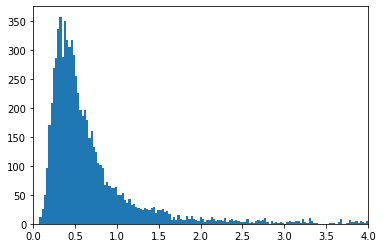

In [9]:
plt.figure()
plt.hist(((y-pred)**2).mean(axis=1)**0.5, 200)
plt.xlim(0,4)
plt.show()

Calculating the mean RMSE for each assessment. Appending the results in the dataframe

In [10]:
df['rmse'] = ((y-pred)**2).mean(axis=1)**0.5

unsam = df.shape[0]//4
df.iloc[:unsam,:].sort_values(by='rmse').to_csv('comparison_macro_predictions.csv', index=None)

In [11]:
df

,name,sgnum,y0,p0,diff0,y1,p1,diff1,y2,p2,...,y3,p3,diff3,y4,p4,diff4,y5,p5,diff5,rmse
0,4508154,4,13.967982,13.693322,0.274660,11.851600,11.241983,0.609616,5.060856,5.582611,...,9.036960,8.401048,0.635912,4.608352,5.077301,0.468949,4.654273,4.898581,0.244308,0.483612
1,2015376,14,15.580000,15.319156,0.260844,10.736209,10.333146,0.403063,3.780874,3.823227,...,8.840469,8.594341,0.246128,3.674232,3.651365,0.022867,3.495663,3.530579,0.034916,0.221590
2,7112158,2,13.153855,12.629101,0.524754,8.873011,9.106284,0.233273,8.312688,8.110482,...,6.839929,7.117682,0.277753,6.631208,6.551533,0.079676,5.817627,5.957516,0.139889,0.280991
3,2103707,14,11.360324,10.662913,0.697411,7.677181,8.615069,0.937888,7.225000,7.263194,...,5.759477,6.559688,0.800211,6.096498,5.909026,0.187472,5.261444,5.437319,0.175875,0.587919
4,4022534,4,10.275040,10.192387,0.082653,9.330000,8.820319,0.509681,8.044606,7.513569,...,6.907302,6.919978,0.012676,5.962946,6.137363,0.174417,6.092580,5.851069,0.241511,0.325964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,4508987,2,14.439140,13.683589,0.755551,8.967385,9.663843,0.696458,6.005630,6.059844,...,8.515356,7.498591,1.016765,5.658073,5.374938,0.283135,5.409076,5.072181,0.336895,0.617296
7376,7203856,2,10.143920,7.863159,2.280761,6.608419,6.962204,0.353785,5.748573,6.153078,...,5.052123,5.286324,0.234201,4.948635,4.849187,0.099448,3.878017,4.529308,0.651291,0.998297
7377,4106398,4,13.315091,12.990561,0.324530,9.801565,9.581564,0.220001,9.645800,8.310623,...,7.455903,7.480921,0.025018,7.811470,6.786604,1.024865,6.875020,6.281896,0.593124,0.746010
7378,2219226,4,12.914854,12.753563,0.161291,8.289500,8.030386,0.259114,6.027814,6.075092,...,6.976118,6.532915,0.443203,5.034684,5.250099,0.215415,4.875166,4.666563,0.208603,0.252236
